# CLASIFICACION: Notas estudiantes

## IMPORTACIONES, REVISION DATOS, DIVISIONES y NORMALIZACION

### IMPORTACIONES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression, Perceptron, SGDClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, recall_score

# Importar datos 
df = pd.DataFrame({
    "Nombre": ["Juan","Maria", "Jose", "Pipe", "Daniel", "Alejandra", "Michael", "Bryan", "Andres", "Tania", "Helver","Sebas", "Julie", "Olarte", "Collazos", "Mario", "Sofia", "Victoria", "Jade", "Carly", "Hanna", "Zazk", "Cody", "Drake", "Josh", "Zoe", "Alex", "Lil", "Catherine", "Jose", "Mora", "Sandra", "Yeimi", "Cindy", "Yaz", "Esperanza", "Hermelinda", "Avila", "Josue", "Clifford", "Diego", "David", "Gavi", "Pedri", "Ansu", "Fati", "Lewa", "Ter", "Depay", "Sergio", "Ronald", "Araujo", "Busquets", "Roberto", "Pique", "Messi", "Vinicius", "Kounde", "Erik", "Kounde", "Rapinha", "Dembele", "Villa", "Luis", "Suarez", "Alfonso", "Alonso", "Coutinho", "Neymar", "Depay"],
    "Hermanos": ["3", "2", "0", "1", "1", "0", "0","1", "1", "0", "3", "0","1","0", "0","3", "3", "2", "1", "1", "1", "0", "3", "0","1","0", "0","3", "0", "0", "1", "1", "2", "2", "0", "0", "0", "3", "2", "1", "1", "1", "0", "3", "0","1","0", "0","3", "3", "2", "1", "0", "1", "1", "0", "3", "0","1","0", "0","3", "0", "0", "1", "1", "2", "2", "0", "0"],
    "Edad":["18", "19", "18", "20", "21", "19", "18", "22", "23", "21", "20", "18", "19", "18", "20", "21", "19", "18", "22", "23", "21", "20", "18", "19", "18", "20", "21", "19", "18", "22", "18", "19", "18", "20", "21", "19", "18", "22", "23", "21", "20", "18", "19", "18", "20", "21", "19", "18", "22", "23", "21", "20", "20", "21", "19", "18", "22", "23", "21", "20", "18", "19", "18", "20", "21", "19", "18", "22", "23", "21"],
    "Nota Ciencias Datos": ["4.0", "2.9", "4.0", "2.9", "2.1", "4.0", "2.0", "5.0", "2.7", "3.4", "0.3", "1.4", "4.5", "0.5", "4.9", "2.1", "1.8", "4.6", "4.8", "1.2", "5.0", "3.2", "3.4", "4.9", "2.3", "2.4", "2.2", "2.6", "3.5", "3.2", "4.6", "5.0", "2.0", "3.4", "4.9", "2.3", "2.7", "2.9", "2.8", "3.2", "3.1", "4.9", "2.7", "2.9", "2.8", "4.6", "2.4", "2.6", "2.7", "2.8", "1.7", "2.1", "3.9", "5.0", "2.0", "3.0", "4.2", "3.3", "1.3", "3.1", "4.8", "3.3", "3.2", "4.8", "2.4", "3.7", "3.4", "2.6", "3.5", "4.9"],
    "Nota Calculo": ["3.0", "1.9", "4.9", "2.7", "4.1", "3.0", "2.0", "2.0", "3.7", "1.4", "4.3", "2.43", "3.5", "4.5", "3.9", "3.1", "2.8", "3.6", "3.8", "0.2", "3.0", "4.2", "1.4", "4.1", "5.0", "3.7", "1.9", "4.8", "3.7", "4.1", "5.0", "4.8", "4.3", "1.3", "0.2", "1.3", "4.2", "3.1", "2.3", "1.3", "1.8", "5.0", "2.8", "3.1", "2.9", "3.4", "2.8", "3.4", "3.1", "0.6", "3.1", "4.6", "0.2", "4.3", "3.0", "4.9", "4.4", "1.8", "0.2", "1.1", "4.6", "3.5", "2.2", "1.3", "1.0", "3.5", "2.2", "1.3", "3.6", "4.8"],
    "Nota LEA": ["1.0", "4.9", "5.0", "3.0", "2.1", "2.0", "5.0", "3.0", "4.7", "2.4", "4.3", "3.43", "2.5", "4.5", "3.9", "2.1", "4.8", "3.6", "1.8", "3.2", "2.0", "4.2", "2.4", "3.6", "3.3", "4.7", "4.9", "3.8", "3.7", "1.1", "2.3", "4.5", "3.1", "3.3", "1.0", "3.9", "2.4", "5.0", "2.5", "2.0", "1.0", "4.8", "3.2", "2.7", "2.7", "4.1", "2.8", "1.1", "2.6", "5.0", "2.6", "4.2", "4.3", "3.8", "4.3", "4.4", "4.8", "4.2", "4.1", "4.6", "3.5", "5.0", "1.3", "4.3", "3.4", "2.6", "4.5", "4.7", "4.2", "3.9"],
    "Estado Emocional": ["Bueno", "Malo", "Malo", "Bueno", "Malo", "Bueno", "Malo", "Malo", "Bueno", "Malo", "Malo", "Malo", "Bueno", "Malo", "Bueno", "Malo", "Malo", "Bueno", "Bueno", "Malo", "Bueno", "Bueno", "Malo", "Malo", "Malo", "Bueno", "Malo", "Malo", "Bueno","Malo", "Bueno", "Malo", "Malo", "Bueno", "Malo", "Malo", "Bueno", "Bueno", "Malo", "Bueno", "Bueno", "Malo", "Bueno", "Bueno", "Bueno", "Malo", "Malo", "Bueno","Malo", "Bueno", "Malo", "Malo", "Bueno", "Malo", "Malo", "Bueno", "Bueno", "Malo", "Bueno", "Bueno", "Malo", "Malo", "Malo", "Bueno", "Bueno", "Malo", "Bueno","Bueno", "Malo", "Malo"],
    "Pais": ["Colombia", "España", "USA", "Colombia", "Colombia", "Colombia", "Colombia", "Peru", "Colombia", "Colombia", "Argentina", "Bolivia", "Alemania", "Colombia", "Peru", "Colombia", "España", "USA", "Colombia", "Colombia", "Colombia", "Colombia", "Peru", "Colombia", "Colombia", "Argentina", "Bolivia", "Alemania", "Colombia", "Peru", "Colombia", "España", "USA", "Colombia", "Colombia", "Colombia", "Colombia", "Peru", "Colombia", "Colombia", "Argentina", "Bolivia", "Alemania", "Colombia", "Peru", "Colombia", "España", "USA", "Colombia", "Colombia", "Colombia", "Colombia", "Peru", "Colombia", "Colombia", "Argentina", "Bolivia", "Alemania", "Colombia", "Peru", "Colombia", "España", "USA", "Colombia", "Colombia", "Colombia", "Colombia", "Peru", "Colombia", "Colombia"],
    "Pasa Modelos": ["Si", "No", "Si", "Si", "No", "Si", "No", "No", "Si", "No", "No", "No", "Si", "No", "Si", "No", "No", "Si", "Si", "No", "Si", "Si", "No", "No", "No", "Si", "No", "No", "Si", "No", "No", "No", "Si", "No", "Si", "No", "No", "Si", "No", "No", "No", "Si", "Si", "Si", "Si", "Si", "No", "No", "No", "No", "No", "No", "No", "Si", "No", "Si", "Si", "No", "No", "No", "Si", "No", "No", "No", "No", "No", "No", "No", "No", "Si"]
})

### REVISION DATOS

In [2]:
df.iloc[35:]

,Nombre,Hermanos,Edad,Nota Ciencias Datos,Nota Calculo,Nota LEA,Estado Emocional,Pais,Pasa Modelos
35,Esperanza,0,19,2.3,1.3,3.9,Malo,Colombia,No
36,Hermelinda,0,18,2.7,4.2,2.4,Bueno,Colombia,No
37,Avila,3,22,2.9,3.1,5.0,Bueno,Peru,Si
38,Josue,2,23,2.8,2.3,2.5,Malo,Colombia,No
39,Clifford,1,21,3.2,1.3,2.0,Bueno,Colombia,No
40,Diego,1,20,3.1,1.8,1.0,Bueno,Argentina,No
41,David,1,18,4.9,5.0,4.8,Malo,Bolivia,Si
42,Gavi,0,19,2.7,2.8,3.2,Bueno,Alemania,Si
43,Pedri,3,18,2.9,3.1,2.7,Bueno,Colombia,Si
44,Ansu,0,20,2.8,2.9,2.7,Bueno,Peru,Si


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Nombre               70 non-null     object
 1   Hermanos             70 non-null     object
 2   Edad                 70 non-null     object
 3   Nota Ciencias Datos  70 non-null     object
 4   Nota Calculo         70 non-null     object
 5   Nota LEA             70 non-null     object
 6   Estado Emocional     70 non-null     object
 7   Pais                 70 non-null     object
 8   Pasa Modelos         70 non-null     object
dtypes: object(9)
memory usage: 5.0+ KB


In [4]:
#Volver la columan notas en entero 
df['Edad'] = df['Edad'].astype(int)
df["Hermanos"] = df["Hermanos"].astype(float)
df["Nota Ciencias Datos"] = df["Nota Ciencias Datos"].astype(float)
df["Nota Calculo"] = df["Nota Calculo"].astype(float)
df["Nota LEA"] = df["Nota LEA"].astype(float)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Nombre               70 non-null     object 
 1   Hermanos             70 non-null     float64
 2   Edad                 70 non-null     int32  
 3   Nota Ciencias Datos  70 non-null     float64
 4   Nota Calculo         70 non-null     float64
 5   Nota LEA             70 non-null     float64
 6   Estado Emocional     70 non-null     object 
 7   Pais                 70 non-null     object 
 8   Pasa Modelos         70 non-null     object 
dtypes: float64(4), int32(1), object(4)
memory usage: 4.8+ KB


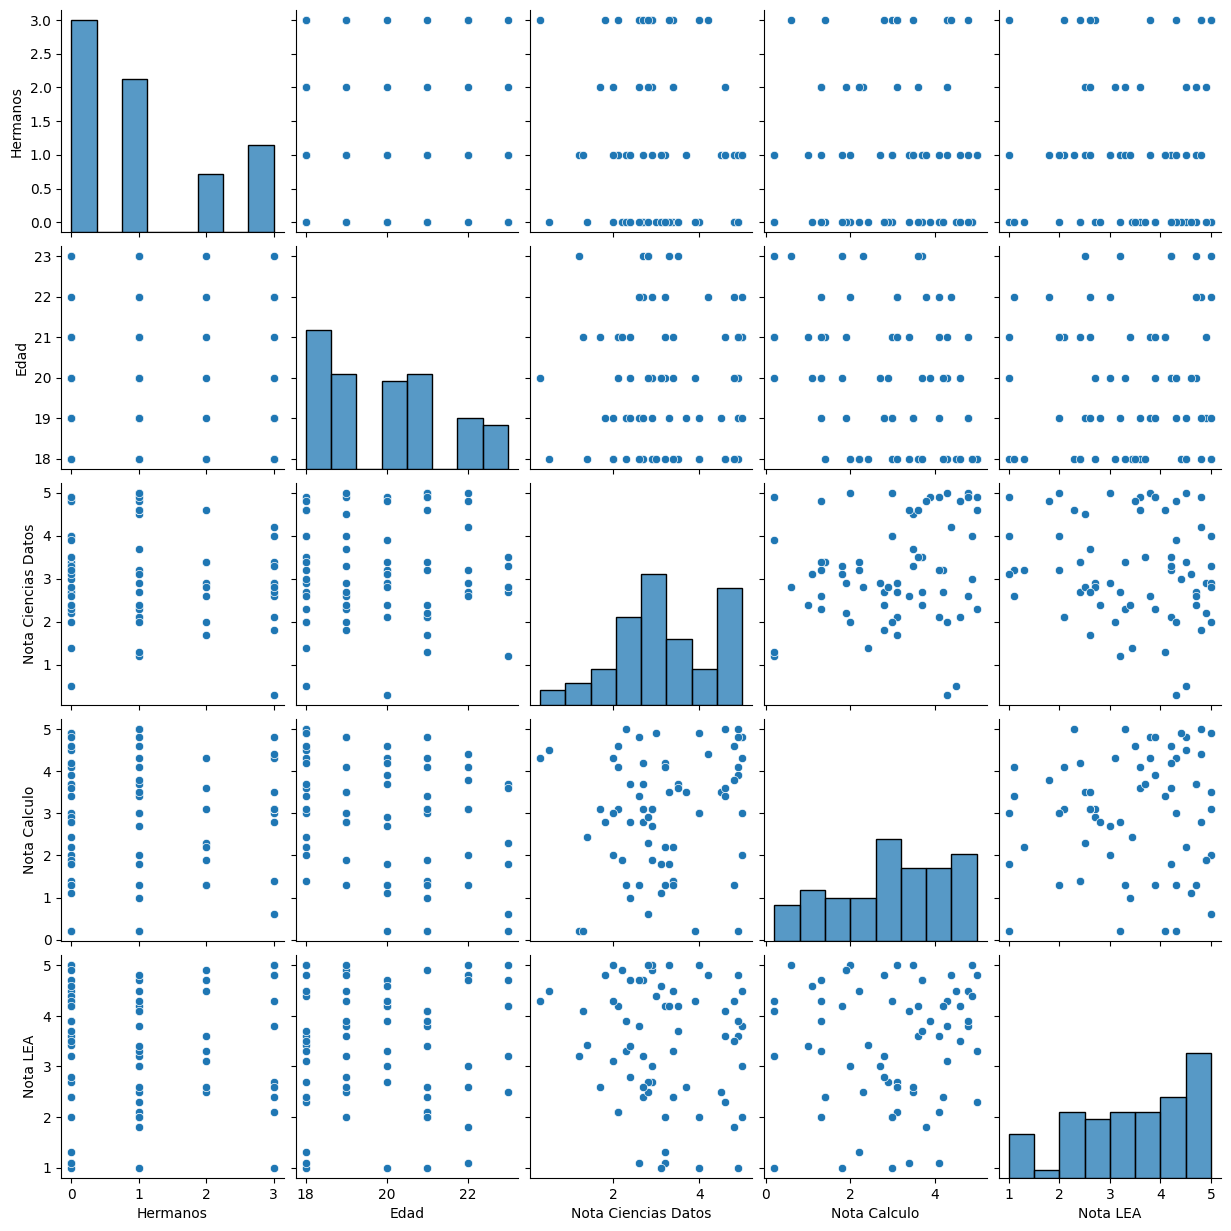

In [6]:
sns.pairplot(df)

In [7]:
df.head()

,Nombre,Hermanos,Edad,Nota Ciencias Datos,Nota Calculo,Nota LEA,Estado Emocional,Pais,Pasa Modelos
0,Juan,3.0,18,4.0,3.0,1.0,Bueno,Colombia,Si
1,Maria,2.0,19,2.9,1.9,4.9,Malo,España,No
2,Jose,0.0,18,4.0,4.9,5.0,Malo,USA,Si
3,Pipe,1.0,20,2.9,2.7,3.0,Bueno,Colombia,Si
4,Daniel,1.0,21,2.1,4.1,2.1,Malo,Colombia,No


In [8]:
#Nuevo DF que se va a usar solo con los datos importantes
dfN = pd.DataFrame()
dfN["Nota Ciencias Datos"] = df["Nota Ciencias Datos"]
dfN["Nota Calculo"] = df["Nota Calculo"]
dfN["Nota LEA"] = df["Nota LEA"]
dfN["Estado Emocional"] = df["Estado Emocional"]
dfN["Pasa Modelos"] = df["Pasa Modelos"]

dfN

,Nota Ciencias Datos,Nota Calculo,Nota LEA,Estado Emocional,Pasa Modelos
0,4.0,3.0,1.0,Bueno,Si
1,2.9,1.9,4.9,Malo,No
2,4.0,4.9,5.0,Malo,Si
3,2.9,2.7,3.0,Bueno,Si
4,2.1,4.1,2.1,Malo,No
...,...,...,...,...,...
65,3.7,3.5,2.6,Malo,No
66,3.4,2.2,4.5,Bueno,No
67,2.6,1.3,4.7,Bueno,No
68,3.5,3.6,4.2,Malo,No


### DIVISION

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(dfN.iloc[:,:4], dfN.iloc[:,4], test_size=0.3, random_state=10)

In [10]:
X_test

,Nota Ciencias Datos,Nota Calculo,Nota LEA,Estado Emocional
38,2.8,2.3,2.5,Malo
3,2.9,2.7,3.0,Bueno
2,4.0,4.9,5.0,Malo
6,2.0,2.0,5.0,Malo
41,4.9,5.0,4.8,Malo
34,4.9,0.2,1.0,Malo
45,4.6,3.4,4.1,Malo
20,5.0,3.0,2.0,Bueno
49,2.8,0.6,5.0,Bueno
62,3.2,2.2,1.3,Malo


### PIPELINE

In [11]:
pipelineNumeros = Pipeline([
    ("Numeros", MinMaxScaler())
])

pipeCat = Pipeline([
    ("Letr a Num" , OrdinalEncoder())
])

columnita = ColumnTransformer([
    ("Nums", pipelineNumeros, [0, 1, 2]),
    ("Cat", pipeCat, [3])
])




In [12]:
X_train = columnita.fit_transform(X_train)

In [13]:
X_test = columnita.transform(X_test)

In [14]:
cambiar = OrdinalEncoder()
Y_train = cambiar.fit_transform(Y_train.values.reshape(-1,1))
Y_test = cambiar.transform(Y_test.values.reshape(-1,1))

In [15]:
X_test

array([[0.53191489, 0.4375    , 0.375     , 1.        ],
       [0.55319149, 0.52083333, 0.5       , 0.        ],
       [0.78723404, 0.97916667, 1.        , 1.        ],
       [0.36170213, 0.375     , 1.        , 1.        ],
       [0.9787234 , 1.        , 0.95      , 1.        ],
       [0.9787234 , 0.        , 0.        , 1.        ],
       [0.91489362, 0.66666667, 0.775     , 1.        ],
       [1.        , 0.58333333, 0.25      , 0.        ],
       [0.53191489, 0.08333333, 1.        , 0.        ],
       [0.61702128, 0.41666667, 0.075     , 1.        ],
       [0.55319149, 0.60416667, 1.        , 0.        ],
       [0.38297872, 0.8125    , 0.275     , 1.        ],
       [0.42553191, 0.22916667, 0.725     , 1.        ],
       [0.5106383 , 0.60416667, 0.4       , 1.        ],
       [0.61702128, 0.83333333, 0.8       , 0.        ],
       [0.19148936, 0.        , 0.55      , 1.        ],
       [0.59574468, 0.1875    , 0.9       , 0.        ],
       [0.91489362, 0.70833333,

In [16]:
Y_test

array([[0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.]])

## PREDICCION

### MODO NORMAL

#### MODELOS

##### REGRESION LINEAL

In [17]:
modeloLineal = LinearRegression()
modeloLineal.fit(X_train, Y_train)

LinearRegression()

In [18]:
modeloLineal.predict(X_test)

array([[-0.07237624],
       [ 0.45860425],
       [ 0.50105428],
       [-0.14354554],
       [ 0.58863298],
       [-0.27167836],
       [ 0.28711344],
       [ 0.6644221 ],
       [ 0.13941904],
       [-0.07716607],
       [ 0.56039932],
       [ 0.15954529],
       [-0.25388596],
       [ 0.05317737],
       [ 0.75255767],
       [-0.53922187],
       [ 0.23968579],
       [ 0.7589022 ],
       [-0.14525285],
       [ 0.06951511],
       [ 0.87924413]])

In [19]:
X_testP = pd.DataFrame(X_test)
X_testP

,0,1,2,3
0,0.531915,0.437500,0.375,1.0
1,0.553191,0.520833,0.500,0.0
2,0.787234,0.979167,1.000,1.0
3,0.361702,0.375000,1.000,1.0
4,0.978723,1.000000,0.950,1.0
5,0.978723,0.000000,0.000,1.0
6,0.914894,0.666667,0.775,1.0
7,1.000000,0.583333,0.250,0.0
8,0.531915,0.083333,1.000,0.0
9,0.617021,0.416667,0.075,1.0


In [20]:
Y_testP = pd.DataFrame(Y_test)
Y_testP

,0
0,0.0
1,1.0
2,1.0
3,0.0
4,1.0
5,1.0
6,1.0
7,1.0
8,0.0
9,0.0


In [21]:
modeloLineal.score(X_testP, Y_testP)

0.2755824694456315

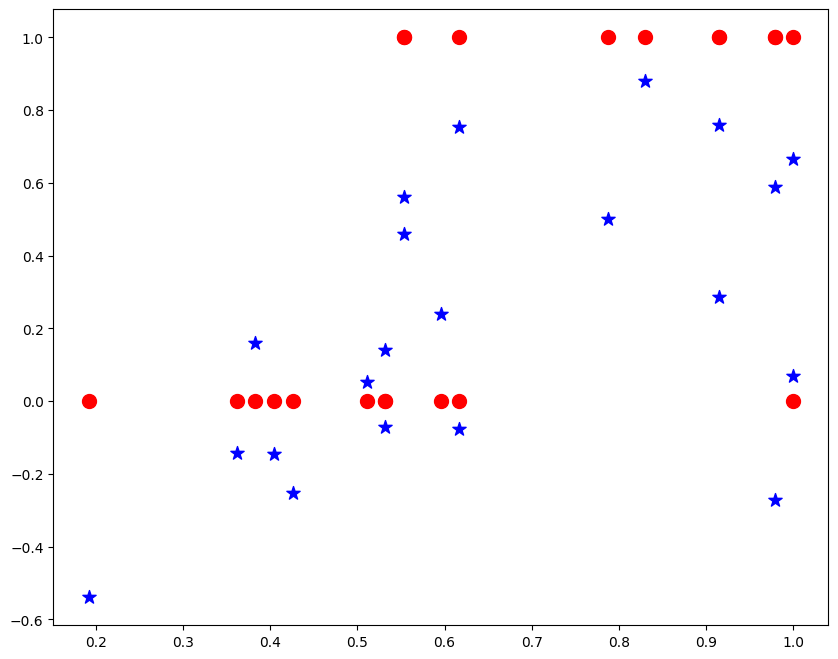

In [22]:

plt.figure(figsize=(10,8))
plt.scatter(X_test[:,0], Y_test, color="red", marker="o", label="Datos Reales", s=100)
plt.scatter(X_test[:,0], modeloLineal.predict(X_test), color="blue", marker="*", label="Predicción", s=100)
#plt.plot(X_test[:,0], modeloLineal.predict(X_test), color="green", label="Recta de Regresión")

##### REGRESION LOGISTICA

In [23]:
#Logistic Regression
modeloLogic = LogisticRegression()
modeloLogic.fit(X_train, Y_train.ravel())

LogisticRegression()

In [24]:
modeloLogic.predict(X_test)

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 1.])

In [25]:
resultLogic = modeloLogic.score(X_testP, Y_testP)

In [26]:
modeloLogic.intercept_, modeloLogic.coef_

(array([-1.607788]),
 array([[ 0.94960355,  1.46097476, -0.0103477 , -1.29904165]]))

In [27]:
logistica = np.frompyfunc(lambda b0, b1, x:
    1 / (1 + np.exp(-(b0 + b1 * x))), 
    3, 1)

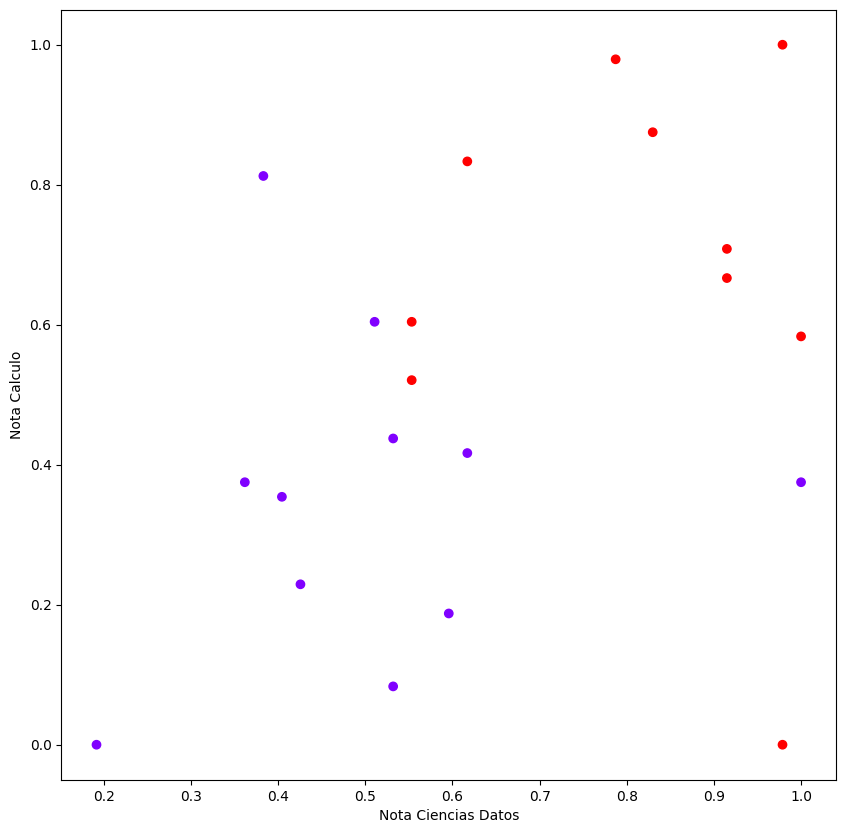

In [28]:
#Grafica del modelo 
plt.figure(figsize=(10,10))
plt.scatter(X_test[:,0], X_test[:,1], c=Y_test, cmap="rainbow")
plt.xlabel("Nota Ciencias Datos")
plt.ylabel("Nota Calculo")
plt.show()



In [29]:
print("LA MAQUINA APRENDIO CON UN: ", resultLogic*100, "'%' de exito con REGRESION LOGISTICA")

LA MAQUINA APRENDIO CON UN:  71.42857142857143 '%' de exito con REGRESION LOGISTICA


##### ARBOLES DE DECISION

In [30]:
modeloArboles = DecisionTreeClassifier(max_depth=3)

modeloArboles.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=3)

In [31]:
modeloArboles.predict(X_test)

array([0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 1.])

In [32]:
resultArbol = modeloArboles.score(X_test, Y_test)

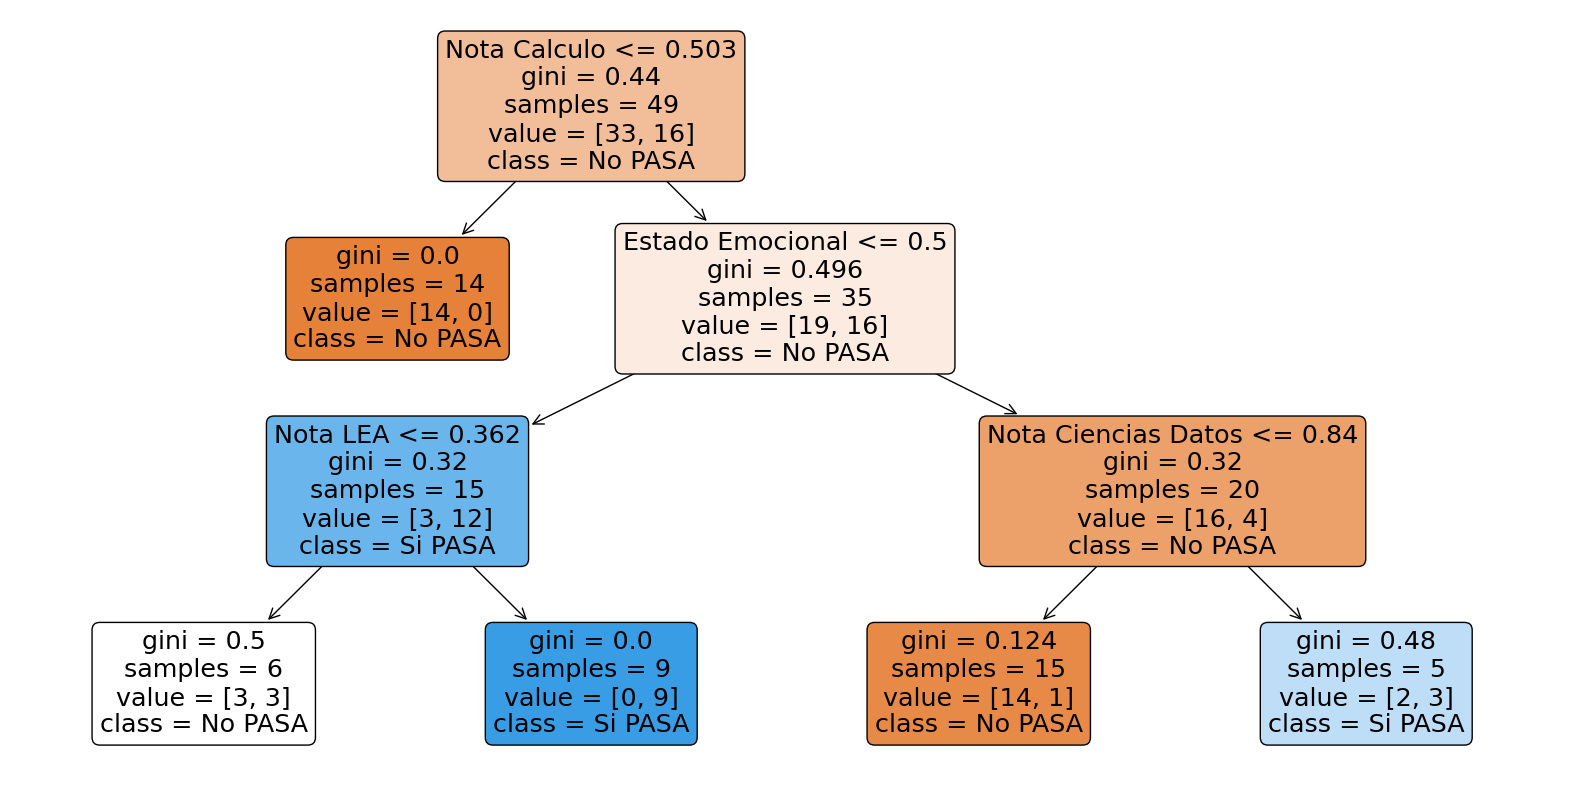

In [33]:
#Graficar arbol de decision con importaciones
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(modeloArboles, filled=True, rounded=True, class_names=["No PASA", "Si PASA"], feature_names=["Nota Ciencias Datos", "Nota Calculo", "Nota LEA", "Estado Emocional"])
plt.show()


In [34]:
print("LA MAQUINA APRENDIO CON UN: ", resultArbol*100, "'%' de exito con ARBOLES DE DESICION")

LA MAQUINA APRENDIO CON UN:  85.71428571428571 '%' de exito con ARBOLES DE DESICION


##### RANDOM FOREST

In [35]:
modeloForest = RandomForestClassifier(n_estimators=110, criterion="gini")
modeloForest.fit(X_train, Y_train.ravel())

RandomForestClassifier(n_estimators=110)

In [36]:
modeloForest.predict(X_test)

array([0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 1.])

In [37]:
resultForest = modeloForest.score(X_test, Y_test)

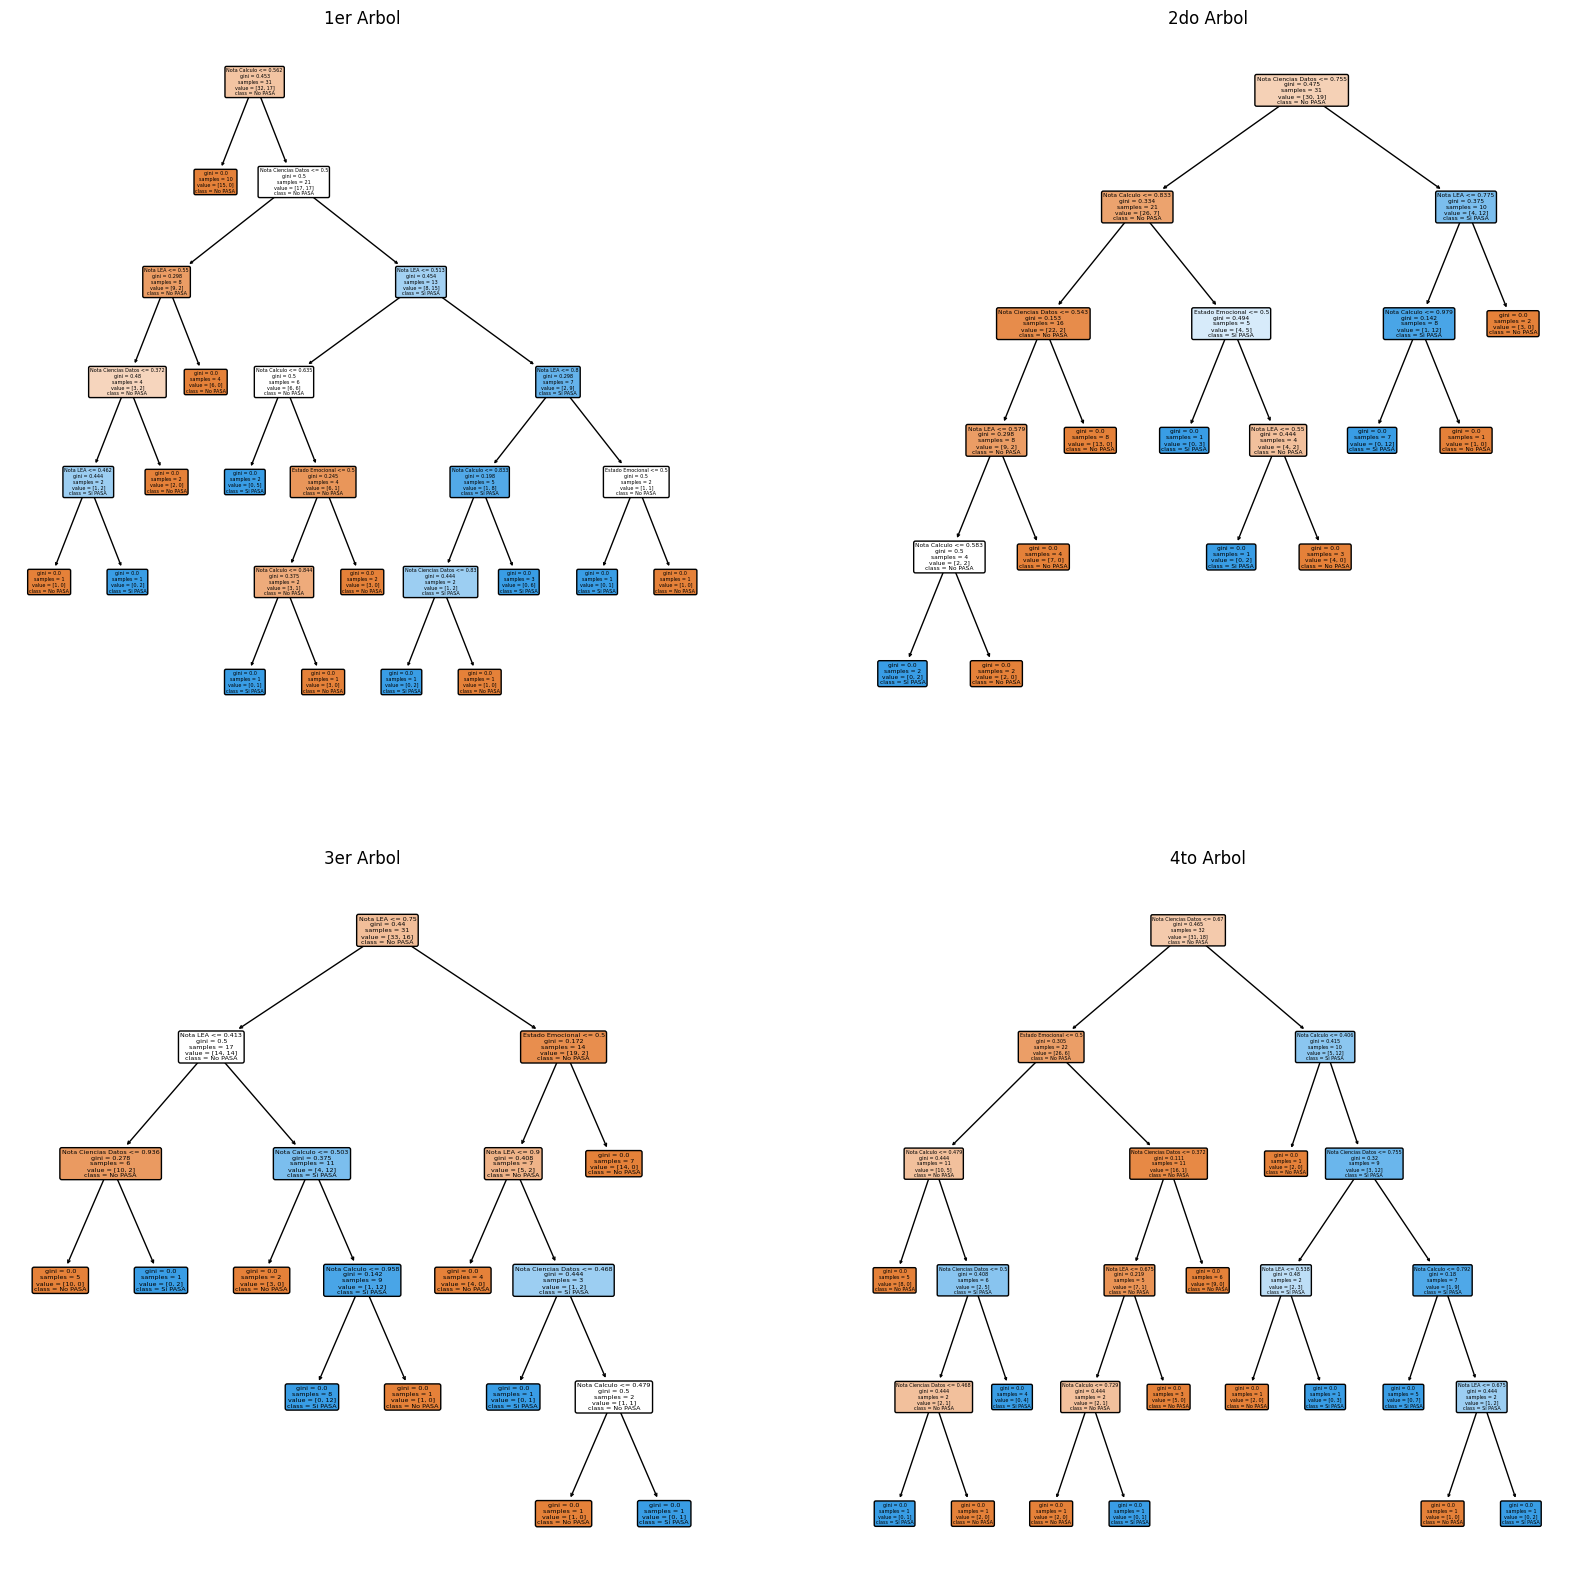

In [38]:
#Graficar 3 arboles 
plt.figure(figsize=(20,20))
plt.subplot(2,2,1)
plot_tree(modeloForest.estimators_[0], filled=True, rounded=True, class_names=["No PASA", "Si PASA"], feature_names=["Nota Ciencias Datos", "Nota Calculo", "Nota LEA", "Estado Emocional"])
plt.title("1er Arbol")

plt.subplot(2,2,2)
plot_tree(modeloForest.estimators_[1], filled=True, rounded=True, class_names=["No PASA", "Si PASA"], feature_names=["Nota Ciencias Datos", "Nota Calculo", "Nota LEA", "Estado Emocional"])
plt.title("2do Arbol")

plt.subplot(2,2,3)
plot_tree(modeloForest.estimators_[2], filled=True, rounded=True, class_names=["No PASA", "Si PASA"], feature_names=["Nota Ciencias Datos", "Nota Calculo", "Nota LEA", "Estado Emocional"])
plt.title("3er Arbol")

plt.subplot(2,2,4)
plot_tree(modeloForest.estimators_[3], filled=True, rounded=True, class_names=["No PASA", "Si PASA"], feature_names=["Nota Ciencias Datos", "Nota Calculo", "Nota LEA", "Estado Emocional"])
plt.title("4to Arbol")

plt.show()

In [39]:
print("LA MAQUINA APRENDIO CON UN: ", resultForest*100, "'%' de exito con ARBOLES RANDOM FOREST")

LA MAQUINA APRENDIO CON UN:  80.95238095238095 '%' de exito con ARBOLES RANDOM FOREST


##### KNN VECINOS MAS CERCANOS

In [40]:
modelovecinos = KNeighborsClassifier(n_neighbors=5)
modelovecinos.fit(X_train, Y_train.ravel())

KNeighborsClassifier()

In [41]:
modelovecinos.n_neighbors

5

In [42]:
modelovecinos.predict(X_test)

array([0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 1.])

In [43]:
resultvecinos = modelovecinos.score(X_test, Y_test)

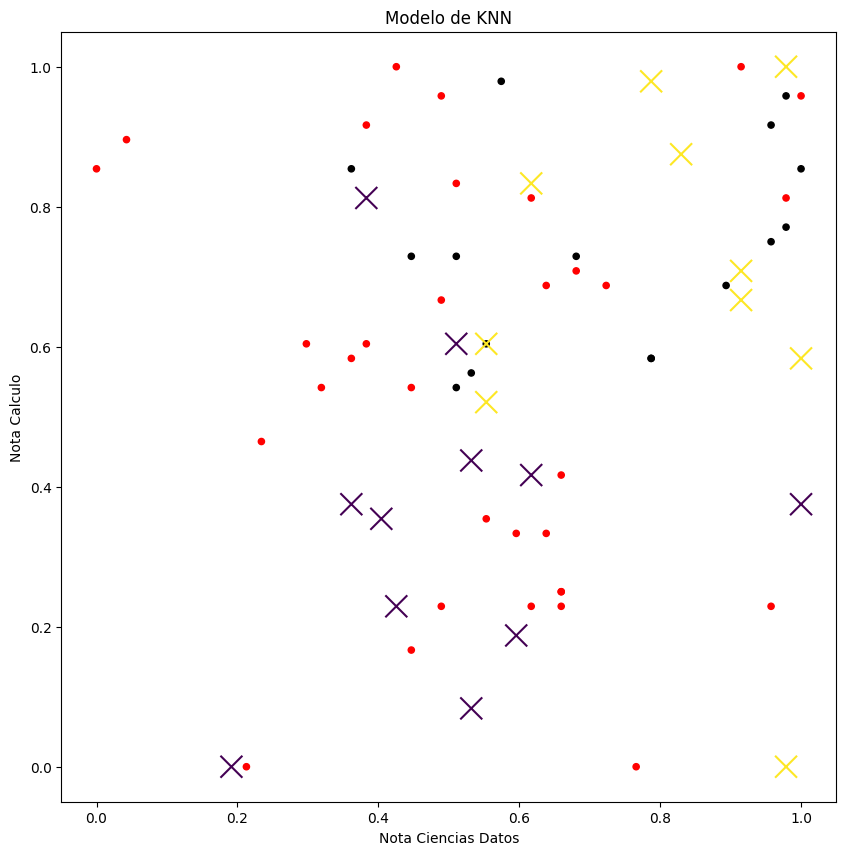

In [44]:
#Graficar vecinos
plt.figure(figsize=(10,10))
#Graficar los puntos de entrenamiento
plt.scatter(X_train[:,0], X_train[:,1], c=Y_train, cmap="flag", s=20, label="Entrenamiento")
#Graficar los puntos de prueba
plt.scatter(X_test[:,0], X_test[:,1], c=Y_test, marker="x", s=250, label= "Puntos de prueba")

plt.xlabel("Nota Ciencias Datos")
plt.ylabel("Nota Calculo")
plt.title("Modelo de KNN")
plt.show()


In [45]:
print("LA MAQUINA APRENDIO CON UN: ", resultvecinos*100, "'%' de exito con VECINOS CERCANOS")

LA MAQUINA APRENDIO CON UN:  90.47619047619048 '%' de exito con VECINOS CERCANOS


##### K MEANS

In [46]:
modeloMeans = KMeans(n_clusters=4)
modeloMeans.fit(X_train, Y_train)

clusters = modeloMeans.labels_
borrar = pd.DataFrame(X_train, columns=["Notas1", "Notas2", "Notas3", "Estado emocional"])
borrar["Clusters"] = clusters
borrar

,Notas1,Notas2,Notas3,Estado emocional,Clusters
0,0.361702,0.854167,0.5250,1.0,3
1,0.680851,0.708333,0.8000,1.0,3
2,0.957447,0.229167,0.8250,0.0,2
3,0.297872,0.604167,0.4000,1.0,3
4,0.000000,0.854167,0.8250,1.0,3
5,1.000000,0.854167,0.7000,1.0,1
6,0.765957,0.000000,0.8250,0.0,2
7,0.978723,0.812500,0.6500,1.0,1
8,0.957447,0.916667,0.6250,1.0,1
9,0.638298,0.687500,1.0000,1.0,3


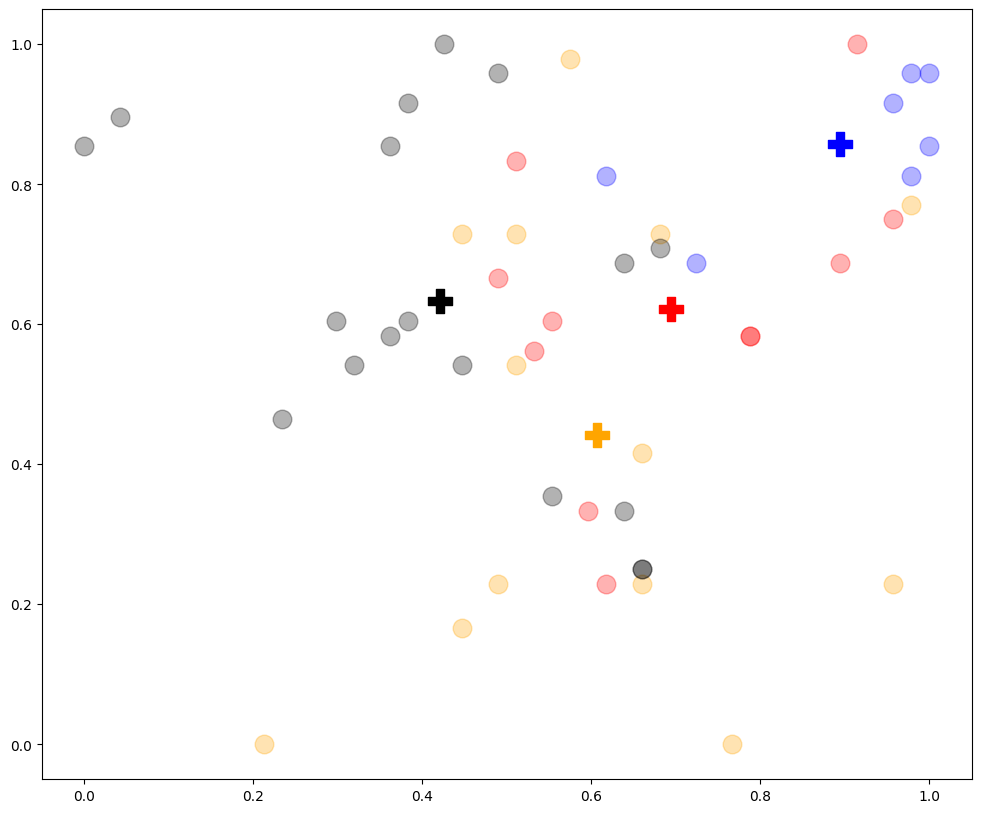

In [47]:
plt.figure(figsize=(12,10), dpi = 100)

colores = ["red", "blue", "orange", "black", "purple", "pink", "brown"]

for cluster in range(modeloMeans.n_clusters):
    plt.scatter(borrar[borrar["Clusters"] == cluster]["Notas1"],
                borrar[borrar["Clusters"] == cluster]["Notas2"],
                marker = "o", s=180, color = colores[cluster], alpha=0.3
                )
    
    plt.scatter(modeloMeans.cluster_centers_[cluster][0],
                modeloMeans.cluster_centers_[cluster][1],
                marker="P", s=280, color=colores[cluster]
                )

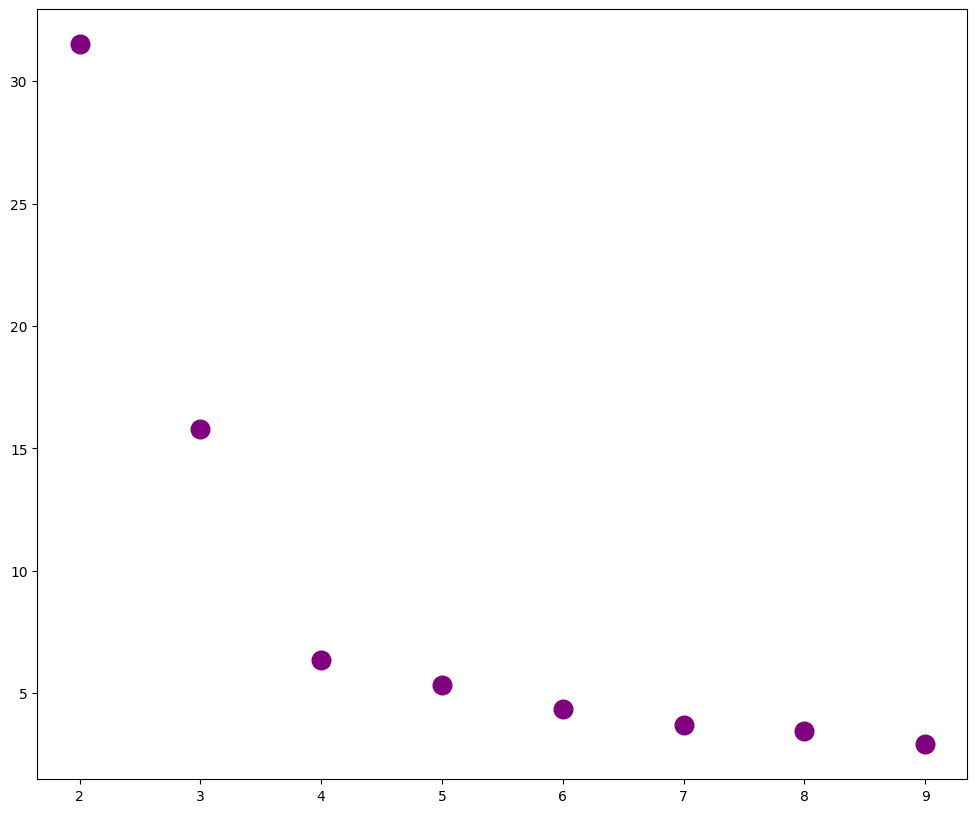

In [48]:
inercias = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k).fit(borrar)
    inercias.append(kmeans.inertia_)
    
plt.figure(figsize=(12,10))
plt.scatter(range(2,10), inercias, marker="o", s=180, color="purple")
plt.show()

##### PERCEPTRON

In [49]:
modeloPercep = Perceptron(max_iter=1000, eta0=0.01)
modeloPercep.fit(X_train, Y_train.ravel())

Perceptron(eta0=0.01)

In [50]:
modeloPercep.predict(X_test)

array([0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1.,
       1., 0., 0., 1.])

In [51]:
resultPercep = modeloPercep.score(X_test, Y_test)

In [52]:
print("LA MAQUINA APRENDIO CON UN: ", resultPercep*100, "'%' de exito con el PERCEPTRON")

LA MAQUINA APRENDIO CON UN:  90.47619047619048 '%' de exito con el PERCEPTRON


##### DESCENSO GRADIENTE

In [53]:
modeloSGD = SGDClassifier(random_state=20)
modeloSGD.fit(X_train, Y_train.ravel())

SGDClassifier(random_state=20)

In [54]:
modeloSGD.predict(X_test)

array([0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 1.])

In [55]:
resultadosDecenso = modeloSGD.score(X_test, Y_test)

In [56]:
print("LA MAQUINA APRENDIO CON UN: ", resultadosDecenso*100, "'%' de exito con DECENSO DE GRADIENTE")

LA MAQUINA APRENDIO CON UN:  95.23809523809523 '%' de exito con DECENSO DE GRADIENTE


#### RESULTADOS Y PRUEBAS

##### RESULTADOS

In [57]:
print("LA MAQUINA APRENDIO CON UN: ", round(resultLogic*100,2), "'%' de exito con REGRESION LOGISTICA")
print("LA MAQUINA APRENDIO CON UN: ", round(resultArbol*100,2), "'%' de exito con ARBOLES DE DESICION")
print("LA MAQUINA APRENDIO CON UN: ", round(resultForest*100,2), "'%' de exito con ARBOLES RANDOM FOREST")
print("LA MAQUINA APRENDIO CON UN: ", round(resultvecinos*100,2), "'%' de exito con VECINOS CERCANOS")
print("LA MAQUINA APRENDIO CON UN: ", round(resultPercep*100,2), "'%' de exito con el PERCEPTRON")
print("LA MAQUINA APRENDIO CON UN: ", round(resultadosDecenso*100,2), "'%' de exito con DECENSO DE GRADIENTE")

LA MAQUINA APRENDIO CON UN:  71.43 '%' de exito con REGRESION LOGISTICA
LA MAQUINA APRENDIO CON UN:  85.71 '%' de exito con ARBOLES DE DESICION
LA MAQUINA APRENDIO CON UN:  80.95 '%' de exito con ARBOLES RANDOM FOREST
LA MAQUINA APRENDIO CON UN:  90.48 '%' de exito con VECINOS CERCANOS
LA MAQUINA APRENDIO CON UN:  90.48 '%' de exito con el PERCEPTRON
LA MAQUINA APRENDIO CON UN:  95.24 '%' de exito con DECENSO DE GRADIENTE


##### PRUEBAS

In [58]:
#Nueva prediccion
nuevos = np.array([4.7, 3.5, 3.2, "Malo"])

#Transformar la nueva prediccion con el column transformer
nuevos = columnita.transform([nuevos])



c:\Users\danie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\danie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but OrdinalEncoder was fitted with feature names
  warnings.warn(


In [59]:
nuevos

array([[0.93617021, 0.6875    , 0.55      , 1.        ]])

In [60]:
modelovecinos.predict(nuevos),modeloPercep.predict(nuevos), modeloSGD.predict(nuevos)

(array([1.]), array([1.]), array([1.]))

In [61]:
modelovecinos.predict_proba(nuevos)

array([[0.4, 0.6]])

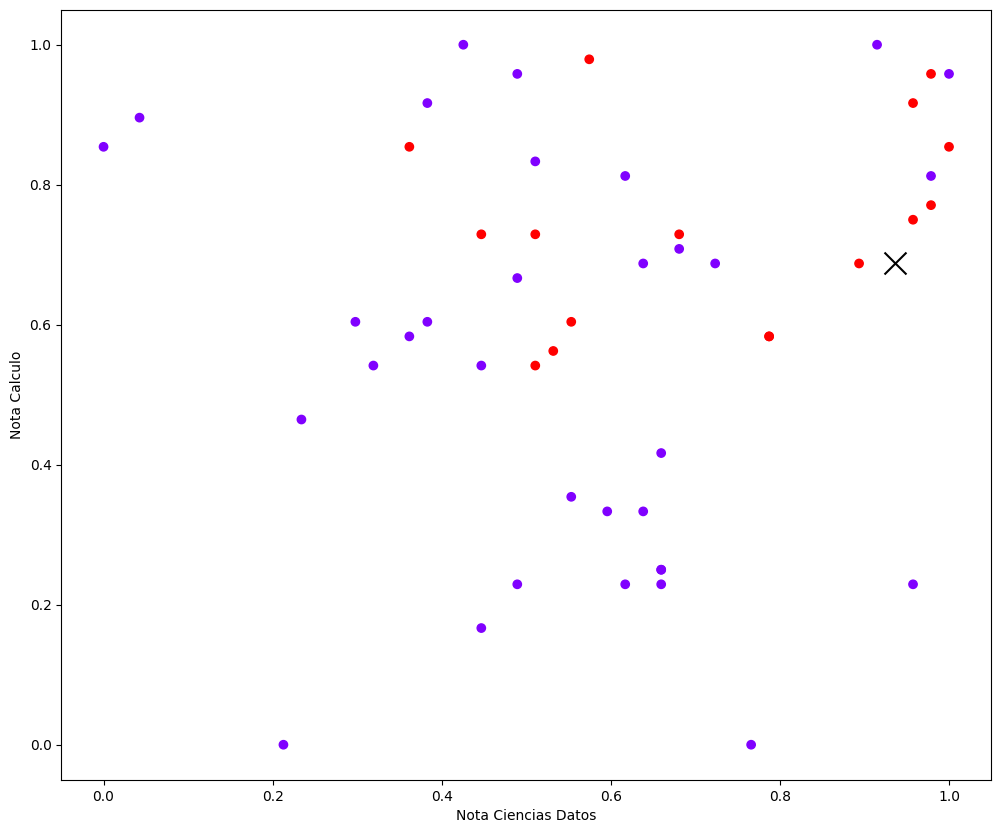

In [62]:
plt.figure(figsize=(12,10))
plt.scatter(X_train[:,0], X_train[:,1], c=Y_train, cmap="rainbow")
plt.scatter(nuevos[:,0], nuevos[:,1], c="black", marker="x", s=250)
plt.xlabel("Nota Ciencias Datos")
plt.ylabel("Nota Calculo")
plt.show()



### VALIDACION CRUZADA

#### MODELOS

##### REGRESION LOGISTICA

In [63]:
resultadosLogic = cross_val_score(modeloLogic, X_train, Y_train.ravel(), cv = 5).mean()
resultadosLogic

0.7333333333333333

##### ARBOLES DE DECISION

In [64]:
resultadosArbol = cross_val_score(modeloArboles, X_train, Y_train.ravel(), cv = 5).mean()
resultadosArbol

0.8377777777777776

##### RANDOM FOREST

In [65]:
resultadosForest = cross_val_score(modeloForest, X_train, Y_train.ravel(), cv = 5).mean()
resultadosForest

0.8177777777777777

##### KNN VECINOS MAS CERCANOS

In [66]:
resultadosVecinos = cross_val_score(modelovecinos, X_train, Y_train.ravel(), cv = 5).mean()
resultadosVecinos

0.7755555555555557

##### PERCEPTRON

In [67]:
resultadosPercep = cross_val_score(modeloPercep, X_train, Y_train.ravel(), cv = 5).mean()
resultadosPercep

0.7177777777777777

##### DECENSO GRADIENTE

In [68]:
resultadosDecenso = cross_val_score(modeloSGD, X_train, Y_train.ravel(), cv = 5).mean()
resultadosDecenso

0.6333333333333333

#### RESULTADOS

In [69]:
print("LA MAQUINA APRENDIO CON UN: ", resultadosLogic*100, "'%' de exito con REGRESION LOGISTICA")
print("LA MAQUINA APRENDIO CON UN: ", resultadosArbol*100, "'%' de exito con ARBOLES DE DESICION")
print("LA MAQUINA APRENDIO CON UN: ", resultadosForest*100, "'%' de exito con ARBOLES RANDOM FOREST")
print("LA MAQUINA APRENDIO CON UN: ", resultadosVecinos*100, "'%' de exito con VECINOS CERCANOS")
print("LA MAQUINA APRENDIO CON UN: ", resultadosPercep*100, "'%' de exito con el PERCEPTRON")
print("LA MAQUINA APRENDIO CON UN: ", resultadosDecenso*100, "'%' de exito con el DECENSO DE GRADIENTE")

LA MAQUINA APRENDIO CON UN:  73.33333333333333 '%' de exito con REGRESION LOGISTICA
LA MAQUINA APRENDIO CON UN:  83.77777777777776 '%' de exito con ARBOLES DE DESICION
LA MAQUINA APRENDIO CON UN:  81.77777777777777 '%' de exito con ARBOLES RANDOM FOREST
LA MAQUINA APRENDIO CON UN:  77.55555555555557 '%' de exito con VECINOS CERCANOS
LA MAQUINA APRENDIO CON UN:  71.77777777777777 '%' de exito con el PERCEPTRON
LA MAQUINA APRENDIO CON UN:  63.33333333333333 '%' de exito con el DECENSO DE GRADIENTE


### BAGGING

#### MODELOS

##### REGRESION LOGISTICA

In [70]:
modeloBaggingLogic = BaggingClassifier(base_estimator=modeloLogic, n_estimators=100)
modeloBaggingLogic.fit(X_train, Y_train.ravel())

BaggingClassifier(base_estimator=LogisticRegression(), n_estimators=100)

In [71]:
modeloBaggingLogic.predict(X_test)

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 1.])

In [72]:
round(modeloBaggingLogic.score(X_test,Y_test),3)

0.714

##### DESCENSO DEL GRADIENTE

In [73]:
modeloBaggingSGD = BaggingClassifier(base_estimator=modeloSGD, n_estimators=100)
modeloBaggingSGD.fit(X_test,Y_test.ravel())

BaggingClassifier(base_estimator=SGDClassifier(random_state=20),
                  n_estimators=100)

In [74]:
y_pred = modeloBaggingSGD.predict(X_test)

In [75]:
X_test.shape, Y_test.shape

((21, 4), (21, 1))

In [76]:
modeloBaggingSGD.score(X_test,Y_test)

0.9523809523809523

In [77]:
accuracy_score(Y_test, y_pred), recall_score(Y_test,y_pred)

(0.9523809523809523, 0.9)

# REGRESION: Precio de carros

## IMPORTACIONES, REVISION DATOS, DIVISIONES y NORMALIZACION

### IMPORTACIONES

In [78]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score



dfCar = pd.read_csv("https://raw.githubusercontent.com/krishnaik06/Car-Price-Prediction/master/car%20data.csv",  index_col=0)
dfCar

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
Car_Name,,,,,,,,
ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...
city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0


### REVISION DATOS

In [79]:
dfCar.drop(["Owner", "Seller_Type", "Present_Price"], axis=1, inplace=True)
#volver columna Selling_Price a numerica
dfCar["Selling_Price"] = dfCar["Selling_Price"].astype(float)

dfCar["Kms_Driven"] = dfCar["Kms_Driven"].astype(float)
dfCar["Year"] = dfCar["Year"].astype(float)

In [80]:
dfCar["Selling_Price"] = dfCar["Selling_Price"]*1.6*4400000

In [81]:
dfCar["Year"].unique()

array([2014., 2013., 2017., 2011., 2018., 2015., 2016., 2009., 2010.,
       2012., 2003., 2008., 2006., 2005., 2004., 2007.])

In [82]:
dfCar.head(20)

,Year,Selling_Price,Kms_Driven,Fuel_Type,Transmission
Car_Name,,,,,
ritz,2014.0,23584000.0,27000.0,Petrol,Manual
sx4,2013.0,33440000.0,43000.0,Diesel,Manual
ciaz,2017.0,51040000.0,6900.0,Petrol,Manual
wagon r,2011.0,20064000.0,5200.0,Petrol,Manual
swift,2014.0,32384000.0,42450.0,Diesel,Manual
vitara brezza,2018.0,65120000.0,2071.0,Diesel,Manual
ciaz,2015.0,47520000.0,18796.0,Petrol,Manual
s cross,2015.0,45760000.0,33429.0,Diesel,Manual
ciaz,2016.0,61600000.0,20273.0,Diesel,Manual


In [83]:
dd = dfCar[ dfCar["Transmission"] == "Automatic"  ]
dd[dd["Year"] == 2017]

,Year,Selling_Price,Kms_Driven,Fuel_Type,Transmission
Car_Name,,,,,
ciaz,2017.0,54560000.0,37000.0,Petrol,Automatic
innova,2017.0,126720000.0,15000.0,Diesel,Automatic
fortuner,2017.0,232320000.0,6000.0,Diesel,Automatic
innova,2017.0,139040000.0,11000.0,Petrol,Automatic
innova,2017.0,161920000.0,15000.0,Diesel,Automatic
Honda Activa 4G,2017.0,3379200.0,4300.0,Petrol,Automatic
Honda Activa 4G,2017.0,3168000.0,4000.0,Petrol,Automatic
Activa 4g,2017.0,2816000.0,1300.0,Petrol,Automatic


In [84]:
dfCar.info()

<class 'pandas.core.frame.DataFrame'>
Index: 301 entries, ritz to brio
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           301 non-null    float64
 1   Selling_Price  301 non-null    float64
 2   Kms_Driven     301 non-null    float64
 3   Fuel_Type      301 non-null    object 
 4   Transmission   301 non-null    object 
dtypes: float64(3), object(2)
memory usage: 14.1+ KB


In [85]:
dfCar.shape

(301, 5)

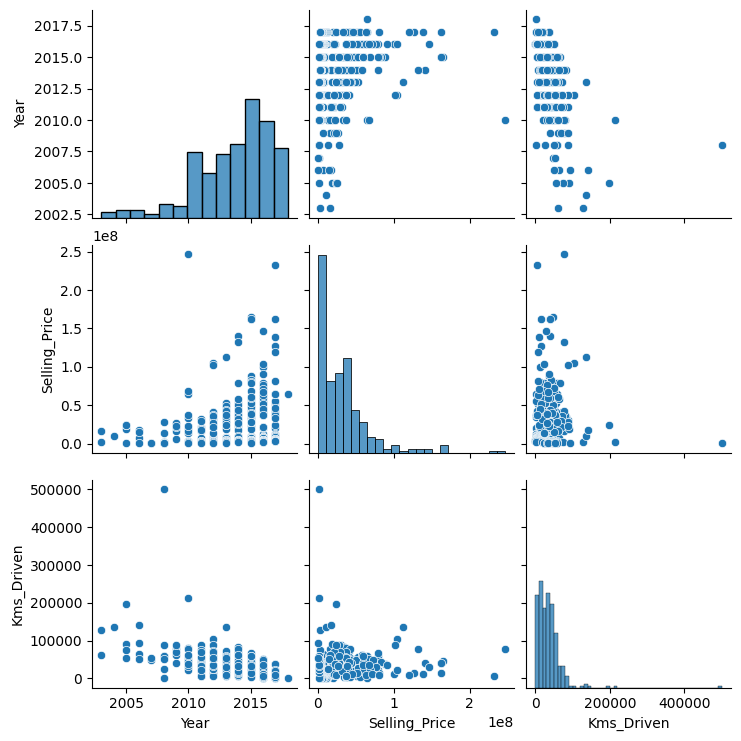

In [86]:
sns.pairplot(dfCar)

### DIVISION

In [87]:
X_train, X_test, Y_train, Y_test = train_test_split(dfCar[["Year", "Kms_Driven", "Fuel_Type", "Transmission"]], dfCar.iloc[:,1], test_size=0.2,random_state=22)

In [88]:
X_test["Fuel_Type"].unique()

array(['Petrol', 'Diesel'], dtype=object)

In [89]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61 entries, Royal Enfield Thunder 350 to dzire
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Year          61 non-null     float64
 1   Kms_Driven    61 non-null     float64
 2   Fuel_Type     61 non-null     object 
 3   Transmission  61 non-null     object 
dtypes: float64(2), object(2)
memory usage: 2.4+ KB


In [90]:
X_test

,Year,Kms_Driven,Fuel_Type,Transmission
Car_Name,,,,
Royal Enfield Thunder 350,2016.0,8700.0,Petrol,Manual
etios cross,2015.0,40534.0,Petrol,Manual
brio,2016.0,5464.0,Petrol,Manual
city,2013.0,54242.0,Petrol,Manual
alto k10,2014.0,46706.0,Petrol,Manual
...,...,...,...,...
fortuner,2010.0,50024.0,Diesel,Manual
TVS Apache RTR 180,2011.0,6000.0,Petrol,Manual
KTM 390 Duke,2014.0,7000.0,Petrol,Manual


In [91]:
X_train["Fuel_Type"].unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [92]:
X_test.shape

(61, 4)

### PIPELINE

In [93]:
tubNumeros = Pipeline([("Nu", MinMaxScaler())])
tubCat = Pipeline([("Ca", OrdinalEncoder())])

columnaCarros = ColumnTransformer([
    ("N", tubNumeros, [0,1]),
    ("C", tubCat, [2,3])
])

In [94]:
X_train = columnaCarros.fit_transform(X_train)

X_test = columnaCarros.transform(X_test)

In [95]:
X_train

array([[9.33333333e-01, 1.62162162e-02, 2.00000000e+00, 1.00000000e+00],
       [6.66666667e-01, 1.28192192e-01, 2.00000000e+00, 1.00000000e+00],
       [8.00000000e-01, 3.50350350e-02, 2.00000000e+00, 1.00000000e+00],
       [7.33333333e-01, 2.64264264e-02, 2.00000000e+00, 1.00000000e+00],
       [5.33333333e-01, 8.90890891e-02, 1.00000000e+00, 1.00000000e+00],
       [6.66666667e-01, 6.30630631e-02, 2.00000000e+00, 1.00000000e+00],
       [8.00000000e-01, 2.48248248e-02, 2.00000000e+00, 0.00000000e+00],
       [2.00000000e-01, 1.83649650e-01, 2.00000000e+00, 1.00000000e+00],
       [4.66666667e-01, 1.17117117e-01, 1.00000000e+00, 1.00000000e+00],
       [9.33333333e-01, 1.28128128e-02, 2.00000000e+00, 1.00000000e+00],
       [8.00000000e-01, 5.54554555e-02, 2.00000000e+00, 1.00000000e+00],
       [7.33333333e-01, 8.92452452e-02, 2.00000000e+00, 1.00000000e+00],
       [8.00000000e-01, 1.21883884e-01, 1.00000000e+00, 1.00000000e+00],
       [6.66666667e-01, 1.12514515e-01, 2.00000000e

In [96]:
modeloMinCarro = MinMaxScaler()
Y_train = modeloMinCarro.fit_transform(Y_train.values.reshape(-1,1))
Y_test = modeloMinCarro.transform(Y_test.values.reshape(-1,1))


In [97]:
Y_train

array([[1.08882521e-02],
       [7.30659026e-02],
       [1.86246418e-02],
       [8.59598854e-03],
       [1.26074499e-01],
       [1.43266476e-02],
       [3.25214900e-01],
       [0.00000000e+00],
       [2.62177650e-01],
       [2.04871060e-01],
       [1.23209169e-01],
       [1.81948424e-01],
       [2.33524355e-01],
       [1.40401146e-01],
       [5.73065903e-02],
       [3.15186246e-02],
       [8.59598854e-02],
       [2.43553009e-02],
       [4.01146132e-02],
       [2.00573066e-03],
       [8.30945559e-02],
       [8.73925501e-02],
       [2.19197708e-01],
       [1.89111748e-01],
       [1.61891117e-01],
       [1.10315186e-01],
       [1.46131805e-01],
       [2.86532951e-03],
       [2.37822350e-01],
       [1.67621777e-01],
       [8.59598854e-02],
       [1.54727794e-01],
       [7.30659026e-02],
       [8.59598854e-02],
       [1.00000000e+00],
       [9.74212034e-02],
       [3.19484241e-01],
       [9.74212034e-02],
       [6.56160458e-01],
       [1.69054441e-01],


## PREDICCION

### MODO NORMAL

#### MODELOS

##### REGRESION LINEAL

In [98]:
modeloLinealCarro = LinearRegression()
modeloLinealCarro.fit(X_train, Y_train)

LinearRegression()

In [99]:
y_prediccionesLinealR = modeloLinealCarro.predict(X_test)

In [100]:
X_test.shape

(61, 4)

In [101]:
modeloLinealCarro.score(X_test, Y_test)

0.07460614653613418

In [102]:
modeloLinealCarro.coef_, modeloLinealCarro.intercept_

(array([[ 0.13605385, -0.03272324, -0.16709543, -0.16562522]]),
 array([0.47786214]))

In [103]:
mseLineal = mean_squared_error(Y_test, y_prediccionesLinealR, squared=False)
r2Lineal = r2_score(Y_test, y_prediccionesLinealR)

mseLineal, r2Lineal

(0.10155550662279687, 0.07460614653613418)

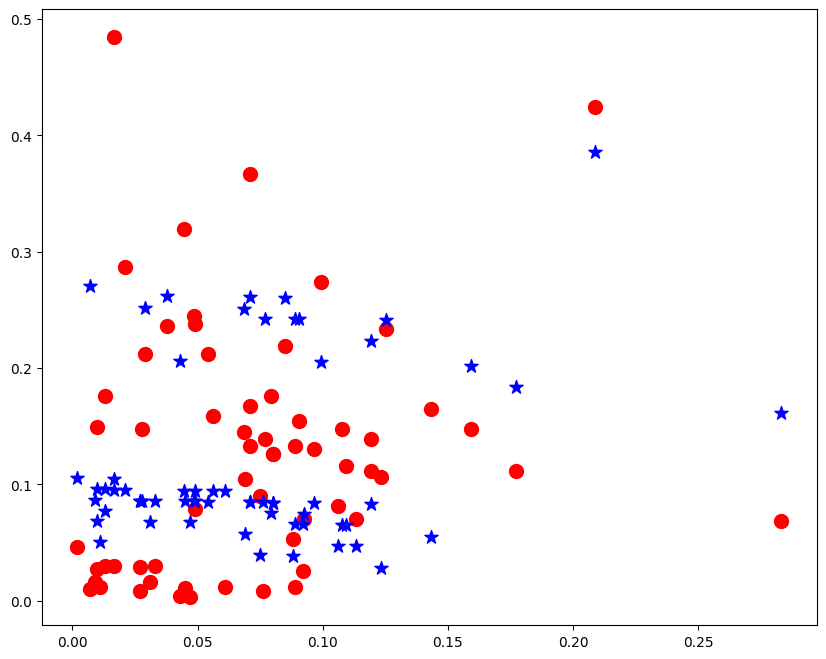

In [104]:
plt.figure(figsize=(10,8))
plt.scatter(X_test[:,1], Y_test, color="red", marker="o", label="Datos Reales", s=100)
plt.scatter(X_test[:,1], modeloLinealCarro.predict(X_test), color="blue", marker="*", label="Predicción", s=100)
#plt.plot(X_test[:,0], modeloLinealCarro.predict(X_test), color="green", label="Recta de Regresión")

##### KNN VECINOS MAS CERCANOS

In [105]:
modeloKnnR = KNeighborsRegressor()
modeloKnnR.fit(X_train, Y_train)

KNeighborsRegressor()

In [106]:
y_prediccionesKnnR = modeloKnnR.predict(X_test)

In [107]:
mseKnn = round(mean_squared_error(Y_test, y_prediccionesKnnR, squared = False),3)
r2Knn = round(r2_score(Y_test, y_prediccionesKnnR), 3)

mseKnn, r2Knn

(0.093, 0.216)

In [108]:
modeloMinCarro.inverse_transform([[0.094]])

array([[23799424.]])

##### DECENSO GRADIENTE

In [109]:
modeloSGDR = SGDRegressor(random_state=22, max_iter=10000, tol=0.0001)
modeloSGDR.fit(X_train, Y_train.ravel())

SGDRegressor(max_iter=10000, random_state=22, tol=0.0001)

In [110]:
y_prediccionesSGDR = modeloSGDR.predict(X_test)

In [111]:
mseSGDR = round(mean_squared_error(Y_test, y_prediccionesSGDR, squared = False),3)
r2SGDR = round(r2_score(Y_test, y_prediccionesSGDR),3)

mseSGDR, r2SGDR


(0.097, 0.161)

#### RESULTADOS Y PRUEBAS

##### RESULTADOS

In [112]:
print("El MSE del modelo KNN es: ", modeloMinCarro.inverse_transform([[mseKnn]]), " y el R2 es: ", r2Knn)
print("El MSE del modelo SGD es: ", modeloMinCarro.inverse_transform([[mseSGDR]]), " y el R2 es: ", r2SGDR)
print("El MSE del modelo Lineal es: ", modeloMinCarro.inverse_transform([[mseLineal]]), " y el R2 es: ", round(r2Lineal,3))

El MSE del modelo KNN es:  [[23553728.]]  y el R2 es:  0.216
El MSE del modelo SGD es:  [[24536512.]]  y el R2 es:  0.161
El MSE del modelo Lineal es:  [[25655781.7551947]]  y el R2 es:  0.075


##### PRUEBAS

<h4>PRUEBA 1 KNN:

In [113]:
prueba = [2018, 1000, "CNG", "Automatic"]

prueba = columnaCarros.transform([prueba])

prediccionCarroKnn = modeloKnnR.predict(prueba)

prediccionCarroKnn = modeloMinCarro.inverse_transform(prediccionCarroKnn)

c:\Users\danie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\danie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but OrdinalEncoder was fitted with feature names
  warnings.warn(


In [114]:
print("EL PRECIO DEL CARRO ES: ",prediccionCarroKnn/1000000, " MILLONES")

EL PRECIO DEL CARRO ES:  [[137.984]]  MILLONES


<h4> PRUEBA 1 DECENSO GRADIENTE:

In [115]:
prueba = [2018, 1000, "CNG", "Automatic"]

prueba = columnaCarros.transform([prueba])

prediccionCarroSGDR = modeloSGDR.predict(prueba)

prediccionCarroSGDR = modeloMinCarro.inverse_transform(prediccionCarroSGDR.reshape(-1,1))

c:\Users\danie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\danie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but OrdinalEncoder was fitted with feature names
  warnings.warn(


In [116]:
print("EL PRECIO DEL CARRO ES: ",prediccionCarroSGDR/1000000, " MILLONES")

EL PRECIO DEL CARRO ES:  [[70.86123689]]  MILLONES


<h3> RESULTADOS PRUEBA 1

In [117]:
print("EL PRECIO DEL PRIMER CARRO ES: ",prediccionCarroKnn/1000000, " MILLONES USANDO KNN")
print("EL PRECIO DEL SEGUNDO CARRO ES: ",prediccionCarroSGDR/1000000, " MILLONES USANDO SGD")

EL PRECIO DEL PRIMER CARRO ES:  [[137.984]]  MILLONES USANDO KNN
EL PRECIO DEL SEGUNDO CARRO ES:  [[70.86123689]]  MILLONES USANDO SGD


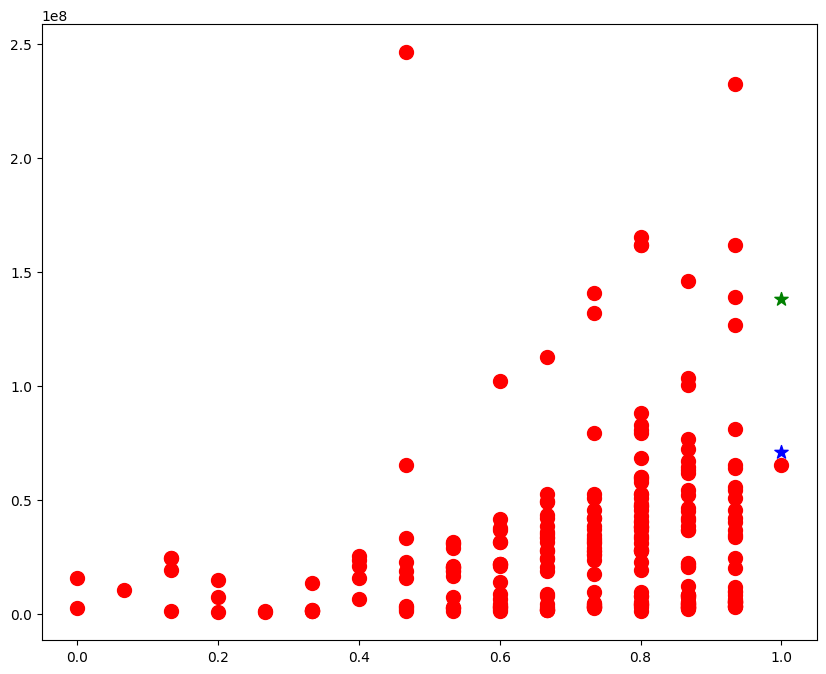

In [118]:
plt.figure(figsize=(10,8))
plt.scatter(X_train[:,0], modeloMinCarro.inverse_transform(Y_train.reshape(-1,1)), color="red", marker="o", label="Datos Reales", s=100)
plt.scatter(prueba[:,0], prediccionCarroSGDR, color="blue", marker="*", label="Predicción SGD", s=100)
plt.scatter(prueba[:,0], prediccionCarroKnn, color="green", marker="*", label="Predicción KNN", s=100)


plt.show()

<h4> PRUEBA 2 KNN:

In [119]:
prueba = [2014, 28000, "Petrol", "Manual"]
prueba = columnaCarros.transform([prueba])

prediccionCarroKnn = modeloKnnR.predict(prueba)

prediccionCarroKnn = modeloMinCarro.inverse_transform(prediccionCarroKnn)

c:\Users\danie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\danie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but OrdinalEncoder was fitted with feature names
  warnings.warn(


In [120]:
print("EL PRECIO DEL CARRO ES: ",prediccionCarroKnn/1000000, " MILLONES")

EL PRECIO DEL CARRO ES:  [[12.3904]]  MILLONES


<h4> PRUEBA 2 DECENSO GRADIENTE:

In [121]:
prueba = [2014, 28000, "Petrol", "Manual"]

prueba = columnaCarros.transform([prueba])

prediccionCarroSGDR = modeloSGDR.predict(prueba)

prediccionCarroSGDR = modeloMinCarro.inverse_transform(prediccionCarroSGDR.reshape(-1,1))

c:\Users\danie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\danie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but OrdinalEncoder was fitted with feature names
  warnings.warn(


In [122]:
print("EL PRECIO DEL CARRO ES: ",prediccionCarroSGDR/1000000, " MILLONES")

EL PRECIO DEL CARRO ES:  [[26.57304564]]  MILLONES


<h3> RESULTADOS PRUEBA 2

In [123]:
print("EL PRECIO DEL SEGUNDO CARRO ES: ",prediccionCarroKnn/1000000, " MILLONES USANDO KNN")
print("EL PRECIO DEL SEGUNDO CARRO ES: ",prediccionCarroSGDR/1000000, " MILLONES USANDO SGD")

EL PRECIO DEL SEGUNDO CARRO ES:  [[12.3904]]  MILLONES USANDO KNN
EL PRECIO DEL SEGUNDO CARRO ES:  [[26.57304564]]  MILLONES USANDO SGD


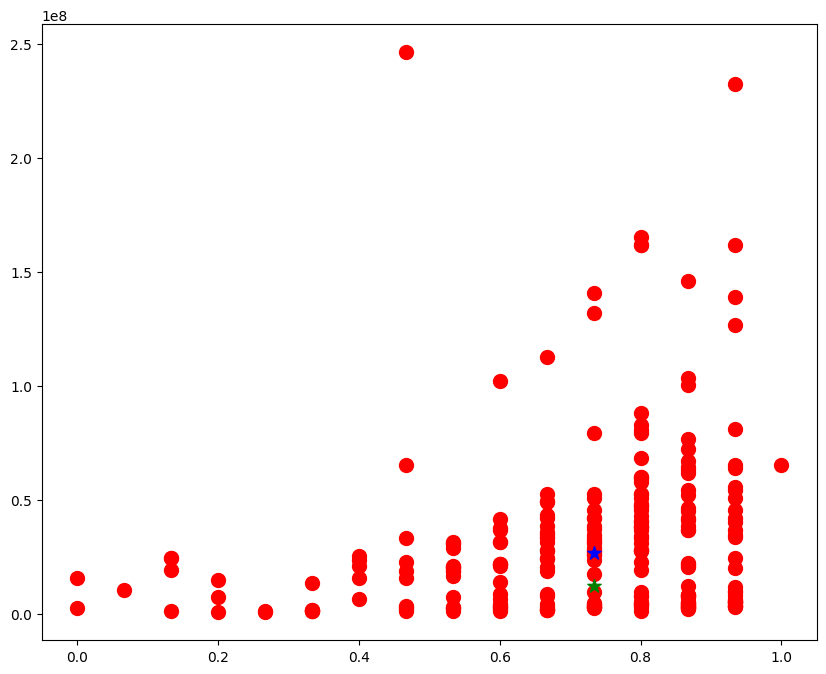

In [124]:
plt.figure(figsize=(10,8))
plt.scatter(X_train[:,0], modeloMinCarro.inverse_transform(Y_train.reshape(-1,1)), color="red", marker="o", label="Datos Reales", s=100)
plt.scatter(prueba[:,0], prediccionCarroSGDR, color="blue", marker="*", label="Predicción SGD", s=100)
plt.scatter(prueba[:,0], prediccionCarroKnn, color="green", marker="*", label="Predicción KNN", s=100)


plt.show()

### BAGGING

#### MODELOS

##### REGRESION LINEAL

In [125]:
modBaggingLineal = BaggingRegressor(base_estimator= modeloLinealCarro, n_estimators=1000, random_state=22)
modBaggingLineal.fit(X_train, Y_train.ravel())

BaggingRegressor(base_estimator=LinearRegression(), n_estimators=1000,
                 random_state=22)

In [126]:
resultadosBaggingLineal = modBaggingLineal.predict(X_test)

In [127]:
round(mean_squared_error(Y_test,resultadosBaggingLineal, squared=False),3), round(r2_score(Y_test,resultadosBaggingLineal),3)

(0.101, 0.08)

##### KNN VECINOS MAS CERCANOS

In [128]:
modBaggingKnn = BaggingRegressor(base_estimator=modeloKnnR, n_estimators=1000, random_state=22)
modBaggingKnn.fit(X_train, Y_train.ravel())

BaggingRegressor(base_estimator=KNeighborsRegressor(), n_estimators=1000,
                 random_state=22)

In [129]:
resultadosBaggingKnn = modBaggingKnn.predict(X_test)

In [130]:
round(mean_squared_error(Y_test,resultadosBaggingKnn, squared=False),3), round(r2_score(Y_test,resultadosBaggingKnn),3)

(0.091, 0.253)

In [131]:
modeloMinCarro.inverse_transform([[0.091]])

array([[23062336.]])

In [132]:
X_trainP = pd.DataFrame(X_train, columns=["Year", "Kilometers_Driven", "Fuel_Type", "Transmission"])
X_testP = pd.DataFrame(X_test, columns=["Year", "Kilometers_Driven", "Fuel_Type", "Transmission"])
Y_trainP = pd.DataFrame(Y_train, columns=["Price"])
Y_testP = pd.DataFrame(Y_test, columns=["Price"])

In [133]:
#importar simpleimputer y standarscaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
for feature in X_trainP.columns:
    regresorLR = Pipeline(
        steps=[('numerical_imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler()),
                ('regresor', LinearRegression())])
    regresorLR.fit(X_trainP[feature].values.reshape(-1,1), Y_trainP)    



    

In [134]:
X_testP[feature]

0     1.0
1     1.0
2     1.0
3     1.0
4     1.0
     ... 
56    1.0
57    1.0
58    1.0
59    1.0
60    1.0
Name: Transmission, Length: 61, dtype: float64

In [139]:
regresorLR.score(X_testP[feature].values.reshape(-1,1), Y_testP)

-0.3252592122436684

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=c8da992b-36fc-428c-bf56-3174143cf62a' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>